In [10]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [11]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA,
                                           QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
import os
PathToRepo = os.path.normpath(os.getcwd() + os.sep + os.pardir)
Data = pd.read_csv('Faellesdata_cleaned.csv')

In [13]:
Y = Data['IsMigratorInt']
X = Data.drop(['IsMigratorInt'], axis=1)
X = pd.DataFrame(
    StandardScaler(
    with_mean=True,
    with_std=True
    ).fit_transform(X)
)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [14]:
results, accuracy = [], []
for K in range(1,150):
    knn = KNeighborsClassifier(n_neighbors=K)
    model = knn.fit(X_train, y_train)
    results.append(model)
    accuracy.append(accuracy_score(y_test, model.predict(X_test)))

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

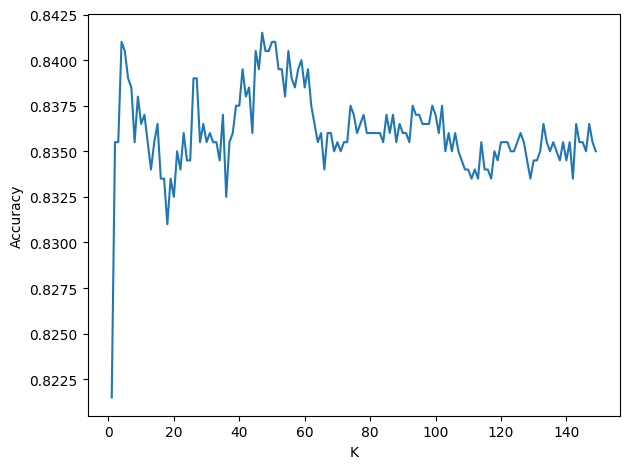

In [16]:
plt.plot(range(1,150), accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig(PathToRepo + '\\Plots\\KNN_accuracy.png')

In [17]:
k_best = accuracy.index(max(accuracy))
print('Best K:', k_best)
print('Accuracy:', accuracy[k_best])

Best K: 46
Accuracy: 0.8415


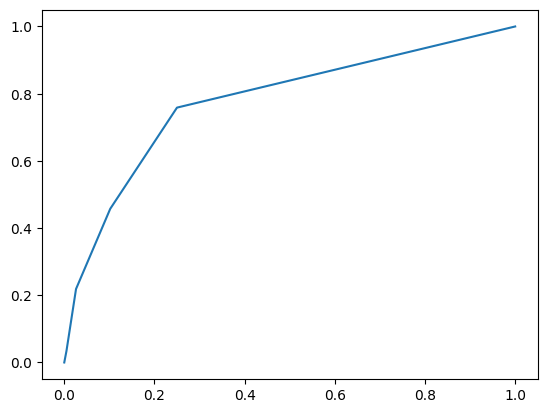

In [18]:
sensitivity, specificity1, thresholds = roc_curve(y_test, results[3].predict_proba(X_test)[:,1])
plt.plot(sensitivity, specificity1);